## Dopplerov efekat i Brza Fourierova transformacija

Izračunavanje brzine kretanja izvora zvuka pomoću Dopplerovog efekta korištenjem Python programskog jezika i algoritma Brze Fourierove transformacije

In [ ]:
#INPUT: zvučni fajl u formatu (.wav)
#OUTPUT: Brzina kretanja izvora zvuka

In [14]:
# Učitavanje potrebnih bibilioteka i paketa

%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import scipy.io.wavfile as wav
from IPython.core.display import HTML, display

# Parametri za crtanje grafova:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (12, 4),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': True, 
             'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

In [15]:
# Funkcija koja učitava i računa FFT

def fft_doppler():
    """
    Output
       P1      :   1D vector
       P2      :   1D vector
       f       :   1D vector
    
    Kako se funkcija poziva
       (P1,P2,f) = fftwrapper()
    """
    
    N=80000        # Broj uzoraka (tacaka) u uzorku1 i uzorku2
    shift1=168000  # Prvi indeks za izdvanjanje uzorka1 (priblizavanje)
    shift2=280000  # Prvi indeks za izdavanje uzorka2 (udaljavanje)
    fcutoff=880    # Maksimalna dopuštena frekvencija u rezultujućem uzorku
    
    # Učitvanje zvučnog fajla i pretvaranje u mono format
    Fs, ystereo = wav.read('Doppler_Demo.wav', 'r')
    ymono = (ystereo[:,0] + ystereo[:,1])/2
    ymono = ymono/max(abs(ymono))
    deltat = 1/Fs  # Frekvencija uzorkovanja, Fs=Bitrate
    
    sample1 = ymono[shift1:N+shift1-1]
    sample2 = ymono[shift2:N+shift2-1]
    
    # FFT transformacija
    p1 = fft(sample1)
    p2 = fft(sample2)
    P1 = np.absolute(p1)**2
    P2 = np.absolute(p2)**2
    f = np.linspace(0,N-1,N)/(N*deltat)
    
    # Redukovanje veličine vektora na željenu veličinu - priprema za crtanje
    ifcutoff= np.nonzero(abs(f-fcutoff)==min(abs(f-fcutoff)))[0]-1
    ifcutoff=int(ifcutoff)
    f = f[0:ifcutoff]
    P1 = P1[0:ifcutoff]
    P2 = P2[0:ifcutoff]
    
    
    return (P1, P2, f)

In [16]:
# Pozivanje i izvršavanje prethodne funkcije
(P1, P2, f) = fft_doppler()

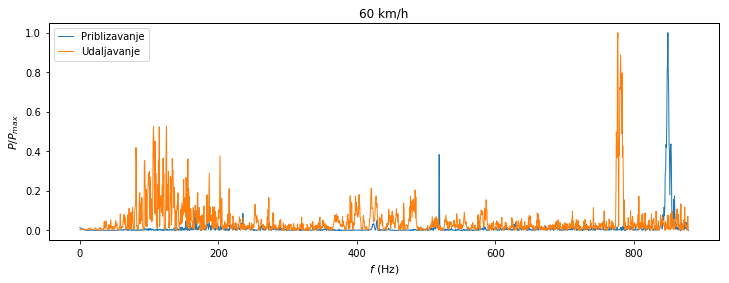

In [17]:
#Crtanje grafa P1 i P2 kao funkcije frekvencije u frekventnom opsegu (0,fcutoff)
plt.plot(f, P1/max(P1), f, P2/max(P2))
plt.xlabel(r"$f$ (Hz)");
plt.ylabel(r"$P/P_{max}$")
plt.title("60 km/h")
plt.legend(['Priblizavanje','Udaljavanje','Location','NorthWest'], loc=2);
plt.savefig("60kmh.png")
plt.show()

In [27]:
# Biranje pikova u oba uzorka
f1 = f[P1==max(P1)]
f2 = f[P2==max(P2)]

print("f1 = %f, f2 = %f" % (f1, f2))

# Izračunavanje brzine kretanja izvora prema forumuli (1):

c = 331.3              # Brzina zvuka na 0°C [m/s]
v = (f1-f2)/(f1+f2)*c   # Brzina izvora [m/s]
v = 3.6*v               # Brzina izvora [km/h]

print("Brzina automobila (t=0°C) je %0.2f km/h." % v)

temp=30.
c = 331.3*np.sqrt(1+temp/273)              # Brzina zvuka na temperaturi t [m/s]
v = (f1-f2)/(f1+f2)*c   # Brzina izvora [m/s]
v = 3.6*v               # Brzina izvora [km/h]

print("Brzina automobila pri %0.2i°C je %0.2f km/h." % (temp, v))

f1 = 848.925000, f2 = 776.711250
Brzina automobila (t=0°C) je 52.98 km/h.
Brzina automobila pri 30°C je 55.82 km/h.
